#**Proyecto V**
### Harrison Smith Suarez Neuta
### Tatiana Chavez Perez
### Carlos Fernando Gonzalez Sarmiento
### Harold Arturo Rojas Camacho 

### Librerias necesarias para el proceso.

In [ ]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt

##### Link donde se obtuvieron las bases de datos de la GEIH, http://microdatos.dane.gov.co/index.php/catalog/707/get_microdata

### Lectura de bases, por drive o cargandolas directamente del escritorio.

In [ ]:
from google.colab import drive #Para que permita abrir Drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
T1 = pd.read_csv('/content/drive/MyDrive/Tablas/Caracteristicas generales (Personas).csv',sep=";")
T2 = pd.read_csv('/content/drive/MyDrive/Tablas/Desocupados.csv',sep=";")
T3 = pd.read_csv('/content/drive/MyDrive/Tablas/Fuerza de trabajo.csv',sep=";")
T4 = pd.read_csv('/content/drive/MyDrive/Tablas/Inactivos.csv',sep=";")
T5 = pd.read_csv('/content/drive/MyDrive/Tablas/Ocupados.csv',sep=";")

### Union de bases de datos por el indice "Directorio".


In [ ]:
T1 = T1[['DIRECTORIO','DPTO','AREA','P6020','P6040']]
T2 = T2[['DIRECTORIO','DSI']]
T3 = T3[['DIRECTORIO','FT','P6240','P6250','P6260','P6270','P6280','P6290','P6300','P6320','P6330','P6340','P6350','P6351']]
T4 = T4[['DIRECTORIO','INI']]
T5 = T5[['DIRECTORIO','P6500','P6750','P6760','P6800','P6850','P6830','OCI','P6430','RAMA2D_R4']]

In [ ]:
DF1 = pd.merge(T1, T2, on='DIRECTORIO') 

In [ ]:
DF2 = pd.merge(DF1,T3, on="DIRECTORIO")

In [ ]:
DF3 = pd.merge(DF2,T4, on="DIRECTORIO")

In [ ]:
DATOS = pd.merge(DF3,T5, on="DIRECTORIO")
DATOS

,DIRECTORIO,DPTO,AREA,P6020,P6040,DSI,FT,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6320,P6330,P6340,P6350,P6351,INI,P6500,P6750,P6760,P6800,P6850,P6830,OCI,P6430,RAMA2D_R4
0,2271,97,97,1,57,1,1,4,2,1,,,,,,,,,,1,4000000,,,40,0,5,1,2,85
1,2271,97,97,1,57,1,1,4,2,2,2,1,2,,,,,,1,1,4000000,,,40,0,5,1,2,85
2,2271,97,97,1,57,1,1,4,2,2,2,2,,2,,,,,,1,4000000,,,40,0,5,1,2,85
3,2271,97,97,2,40,1,1,4,2,1,,,,,,,,,,1,4000000,,,40,0,5,1,2,85
4,2271,97,97,2,40,1,1,4,2,2,2,1,2,,,,,,1,1,4000000,,,40,0,5,1,2,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268428,5328143,86,86,1,18,1,1,1,,,,,,,,,,,,1,,98,1,40,40,,1,4,95
268429,5328143,86,86,1,18,1,1,4,2,2,2,2,,2,,,,,,1,,98,1,40,40,,1,4,56
268430,5328143,86,86,1,18,1,1,4,2,2,2,2,,2,,,,,,1,,98,1,40,40,,1,4,95
268431,5328143,86,86,1,18,1,1,1,,,,,,,,,,,,1,,98,1,40,40,,1,4,56


In [ ]:
DATOS = DATOS.replace(' ', np.NaN) # Reemplzamos los valores faltantes por NaN

In [ ]:
DATOS

,DIRECTORIO,DPTO,AREA,P6020,P6040,DSI,FT,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6320,P6330,P6340,P6350,P6351,INI,P6500,P6750,P6760,P6800,P6850,P6830,OCI,P6430,RAMA2D_R4
0,2271,97,97,1,57,1,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4000000,NaN,NaN,40,0,5,1,2,85
1,2271,97,97,1,57,1,1,4,2,2,2,1,2,NaN,NaN,NaN,NaN,NaN,1,1,4000000,NaN,NaN,40,0,5,1,2,85
2,2271,97,97,1,57,1,1,4,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1,4000000,NaN,NaN,40,0,5,1,2,85
3,2271,97,97,2,40,1,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4000000,NaN,NaN,40,0,5,1,2,85
4,2271,97,97,2,40,1,1,4,2,2,2,1,2,NaN,NaN,NaN,NaN,NaN,1,1,4000000,NaN,NaN,40,0,5,1,2,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268428,5328143,86,86,1,18,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,98,1,40,40,NaN,1,4,95
268429,5328143,86,86,1,18,1,1,4,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,98,1,40,40,NaN,1,4,56
268430,5328143,86,86,1,18,1,1,4,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,98,1,40,40,NaN,1,4,95
268431,5328143,86,86,1,18,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,98,1,40,40,NaN,1,4,56


In [ ]:
DATOS.shape # Dimensiones de nuestra base de datos

(268433, 29)

In [ ]:
DATOS.isna().sum() # Cuenta de NaN por cada columna o variable

DIRECTORIO         0
DPTO               0
AREA               0
P6020              0
P6040              0
DSI                0
FT                 0
P6240              0
P6250          73823
P6260          83489
P6270          87015
P6280          87313
P6290         202788
P6300         152958
P6320         259308
P6330         263502
P6340         264239
P6350         263754
P6351         197681
INI                0
P6500         128949
P6750         140614
P6760         140614
P6800              0
P6850              0
P6830         242033
OCI                0
P6430              0
RAMA2D_R4          0
dtype: int64

In [ ]:
DATOS['P6040'].mean() #La edad promedio de la población encuestada para la encuesta de GEIH - Nuevos Departamentos de la Amazonia y Orinoquía 2020

26.25290482168735

In [ ]:
y = DATOS['P6020'] 

In [ ]:
(y==2).sum() # Total de Mujeres en la encuesta

136675

In [ ]:
(y==1).sum() # Total de Hombres en la encuesta

131758

In [ ]:
(y==2).sum()/y.count() # Proporcion de Mujeres en la muestra

0.5091587099946728

In [ ]:
((y==1).sum()/y.count()) # Proporcion de Masculinidad

0.4908412900053272

Text(0.5, 0, 'Mujeres                      Hombres')

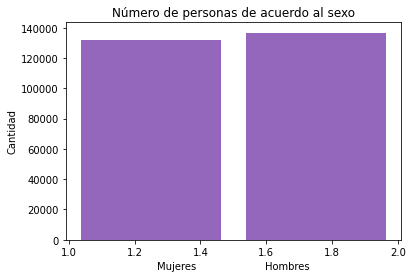

In [ ]:
((y==2).sum()/y.count() - ((y==1).sum()/y.count()))*100 #Diferencia porcentual
label = ['Mujeres','Hombres'] 
plt.hist(y,bins=2, color='tab:purple', rwidth=0.85,label=label)
plt.title("Número de personas de acuerdo al sexo")
plt.ylabel("Cantidad")
plt.xlabel("Mujeres                      Hombres")

COMPARACIÓN DE REGIONES

In [ ]:
VA = [91,86,94,97,95] # CODIGOS DEPARTAMENTOS DE LA REGION AMAZONAS
amz = DATOS[DATOS.DPTO.isin(VA)] # Datos de la region Amazonas

In [ ]:
VO = [81,85,99] # CODIGOS DEPARTAMENTOS DE LA REGION ORINOQUIA
orq = DATOS[DATOS.DPTO.isin(VO)] # Datos de la region Orinoquia


In [ ]:
amz['P6240'] = str(amz['P6240'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
amz[amz['P6800'].notna()] # No tomamos los NaN's para el calculo en la variable 
amz['P6800'].mean() # El promedio de horas de trabajo semanales por persona en la region Amazonas segun la encuesta de GEIH

43.81394579728812

In [ ]:
orq[orq['P6800'].notna()] # No tomamos los NaN's para el calculo en la variable 
orq['P6800'].mean() # El promedio de horas de trabajo semanales por persona en la region Orinoquia segun la encuesta de GEIH

48.336081963903055

In [ ]:
amz.loc[:, ['DPTO','P6800','P6430']].max() # Selección de variables para seleccionar en cual departamento en la region del Amazonas tiene el mayor numero de horas de trabajo por persona 
# y podemos ver que en el departamento de Vaupes hay una persona que trabaja 130 horas por semana como jornalero o peon.

DPTO      97
P6800    130
P6430      8
dtype: int64

In [ ]:
orq.loc[:, ['DPTO','P6800','P6430']].max() # Selección de variables para seleccionar en cual departamento en la region de Orinoquia tiene el mayor numero de horas de trabajo por persona 
# y podemos ver que al igual que en la region del Amazonas en el departamento de Vichada hay una persona que trabaja 130 horas por semana como jornalero o peon.

DPTO      99
P6800    130
P6430      8
dtype: int64

In [ ]:
PET_amz = amz['FT'].sum() + amz['DSI'].sum() 
PET_amz #Poblacion en edad de trabajar de la region Amazonas, PEA + PEI

229804

In [ ]:
PET_orq = orq['FT'].sum() + orq['DSI'].sum()
PET_orq #Poblacion en edad de trabajar de la region Amazonas, PEA + PEI

307062

Text(0, 0.5, 'Frecuencia')

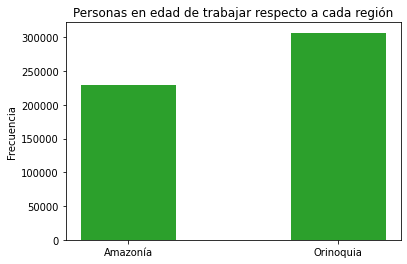

In [ ]:
PET_orq-PET_amz #Diferencia de personas en edad de trabajar 
s = ["Amazonía","Orinoquia"]
m = [PET_amz,PET_orq]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Personas en edad de trabajar respecto a cada región")
plt.ylabel("Frecuencia")


In [ ]:
((amz['P6240']==1)==True).sum() #Número de personas del departamento del Amazonas que trabajaron la mayor parte del tiempo la semana pasada


0

In [ ]:
((orq['P6240']==1)==True).sum() #Número de personas del departamento de la Orinoquia que trabajaron la mayor parte del tiempo la semana pasada


37738

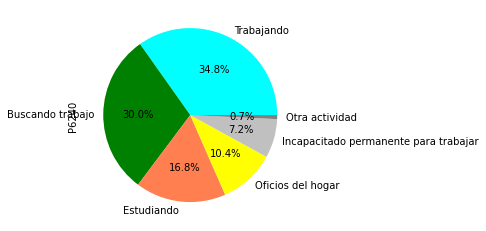

In [ ]:
VA = [91,86,94,97,95] 
amz = DATOS[DATOS.DPTO.isin(VA)]
colores = ['cyan','green','coral','yellow','silver', 'grey']
act = ["Trabajando","Buscando trabajo","Estudiando","Oficios del hogar","Incapacitado permanente para trabajar","Otra actividad"]
serie = amz['P6240'].value_counts()
serie.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores) 
#Proporcion de las personas de las actividades que la mayor parte del tiempo la semana pasada.
#1 Trabajando
#2 Buscando trabajo
#3 Estudiando
#4 Oficios del hogar
#5 Incapacitado permanente para trabajar
#6 Otra actividad


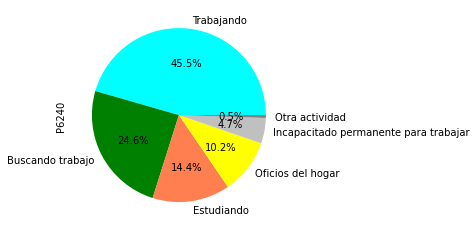

In [ ]:
VO = [81,85,99] 
orq = DATOS[DATOS.DPTO.isin(VO)] 
act = ["Trabajando","Buscando trabajo","Estudiando","Oficios del hogar","Incapacitado permanente para trabajar","Otra actividad"]
serie1 = orq['P6240'].value_counts()
colores = ['cyan','green','coral','yellow','silver', 'grey']
serie1.plot.pie(autopct = '%1.1f%%',labels=act,colors= colores)#Proporcion de las personas de las actividades que la mayor parte del tiempo la semana pasada.
#Se puede evidenciar que en ambos departamentos la actividad más realizada en la semana pasada desde la encuesta es el trabajo 

Text(0, 0.5, 'Frecuencia')

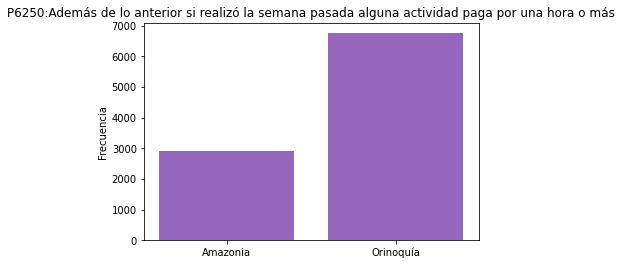

In [ ]:
# Pregunta P6250: Además de lo anterior, ¿... Realizó la semana pasada alguna actividad paga por una hora o más?
#Respuesta Sí
x = ['Amazonia','Orinoquía'] 
c = [(amz['P6250']=='1').sum(),(orq['P6250']=='1').sum()]
plt.bar(x,c, color='tab:purple')
plt.title("P6250:Además de lo anterior si realizó la semana pasada alguna actividad paga por una hora o más") #Se tiene encuenta para la pregunta la respuesta sí
plt.ylabel("Frecuencia")
#La región de la Orinoquía presenta mayor cantidad de personas que si realizaron la semana pasada alguna actividad paga por una hora o más

Text(0, 0.5, 'Frecuencia')

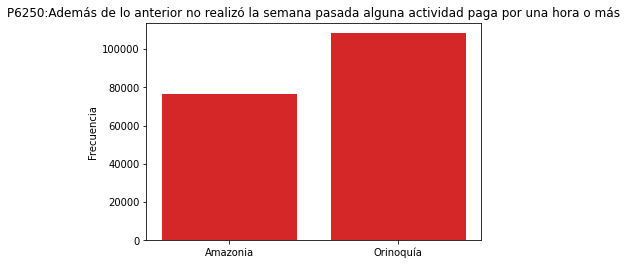

In [ ]:
# Pregunta P6250: Además de lo anterior, ¿... Realizó la semana pasada alguna actividad paga por una hora o más?
#Respuesta No 
x = ['Amazonia','Orinoquía'] 
c = [(amz['P6250']=='2').sum(),(orq['P6250']=='2').sum()]
plt.bar(x,c, color='tab:red')
plt.title("P6250:Además de lo anterior no realizó la semana pasada alguna actividad paga por una hora o más") #Se tiene encuenta para la pregunta la respuesta sí
plt.ylabel("Frecuencia")
#La región de la Orinoquía presenta mayor cantidad de personas que no realizaron la semana pasada alguna actividad paga por una hora o más superando una cantidad de 100.000 personas

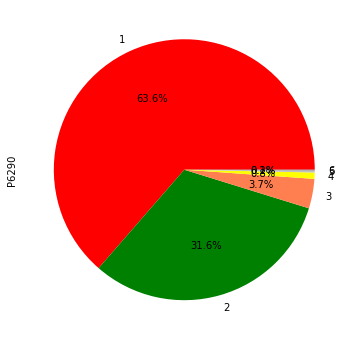

In [ ]:
VA = [91,86,94,97,95] 
amz = DATOS[DATOS.DPTO.isin(VA)]
serie3 = amz['P6290'].value_counts()
colores = ['red','green','coral','yellow','silver', 'grey']
act = ["1","2","3","4","5","6","7","8"]
serie3.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(6,6)) 
#¿Qué hizo ... principalmente en las ÚLTIMAS CUATRO SEMANAS para conseguir un trabajo o instalar un negocio?
#1.. Pidió ayuda a familiares, amigos, colegas
#2. Visitó, llevó o envió hojas de vida a empresas o empleadores
#3. Visitó, llevó o envió hojas de vida a bolsas de empleo o intermediarios
#4. Puso o consulto avisos clasificados
#5. Se presentó a convocatorias
#6. Hizo preparativos para iniciar un negocio
#7. Otro medio
#8. No sabe, no informa



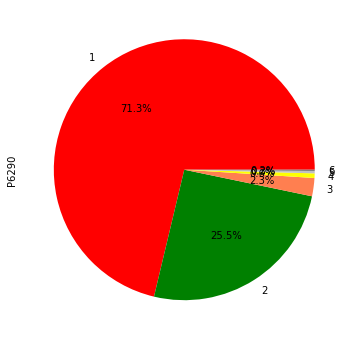

In [ ]:
VO = [81,85,99] 
orq = DATOS[DATOS.DPTO.isin(VO)] 
serie4 = orq['P6290'].value_counts()
colores = ['red','green','coral','yellow','silver', 'grey']
act = ["1","2","3","4","5","6","7","8"]
serie4.plot.pie(autopct = '%1.1f%%',labels=act,colors=colores,figsize=(6,6)) 
#¿Qué hizo ... principalmente en las ÚLTIMAS CUATRO SEMANAS para conseguir un trabajo o instalar un negocio?
#1.. Pidió ayuda a familiares, amigos, colegas
#2. Visitó, llevó o envió hojas de vida a empresas o empleadores
#3. Visitó, llevó o envió hojas de vida a bolsas de empleo o intermediarios
#4. Puso o consulto avisos clasificados
#5. Se presentó a convocatorias
#6. Hizo preparativos para iniciar un negocio
#7. Otro medio
#8. No sabe, no informa




En ambos departamentos principalmente en las ÚLTIMAS CUATRO SEMANAS desde la encuesta para conseguir un trabajo o instalar un negocio recurrieron a pedir ayuda a familiares, amigos, colegas y como segunda opción visitaron, llevaron o enviaron hojas de vida a empresas o empleadores.



In [ ]:
# ¿Cuántos meses hace que dejó de buscar trabajo por última vez?
amz['P6350'].value_counts(), orq['P6350'].value_counts()

(1     761
 12    694
 2     273
 8     198
 3     102
 4      84
 6      63
 7      20
 9      10
 Name: P6350, dtype: int64, 3     2102
 6      142
 2      135
 10      24
 5       20
 8       16
 12      12
 4        8
 1        8
 7        4
 9        3
 Name: P6350, dtype: int64)

Respecto a los datos anteriores se pueden comparar la pregunta P6350: ¿Cuántos meses hace que…dejó de buscar trabajo por última vez?. Dado que es una pregunta abierta se puede evidenciar que para la región del Amazonas el mes que más se repitio fue de un mes que dejaron de buscar trabajo y para Región de la Orinoquía fue de 6 meses.